# Individual Project 4
Brian Johnston  
v1.0  
SP2021 - DS-160-01

In [676]:
import pandas as pd
import matplotlib as mpl
import seaborn as sb
import datetime

In [677]:
df = pd.read_csv('airlineDelays.csv')

# Cleaning

In [678]:
df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,...,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 33
0,2020,12,28,1,2020-12-28,2716,MCO,"Orlando, FL",FL,DFW,...,177.0,146.0,985.0,4,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,12,29,2,2020-12-29,2716,MCO,"Orlando, FL",FL,DFW,...,182.0,150.0,985.0,4,0.0,0.0,5.0,0.0,35.0,NaN
2,2020,12,30,3,2020-12-30,2716,MCO,"Orlando, FL",FL,DFW,...,230.0,148.0,985.0,4,0.0,0.0,60.0,0.0,67.0,NaN
3,2020,12,31,4,2020-12-31,2716,MCO,"Orlando, FL",FL,DFW,...,175.0,154.0,985.0,4,0.0,0.0,0.0,0.0,33.0,NaN
4,2020,12,1,2,2020-12-01,2717,CLT,"Charlotte, NC",NC,MCO,...,89.0,75.0,468.0,2,NaN,NaN,NaN,NaN,NaN,NaN


In [679]:
df['YEAR'].groupby(df['YEAR']).count()

YEAR
2020    371357
Name: YEAR, dtype: int64

In [680]:
def num_to_day(num):
    dic_days = {
    '1':'Monday',
    '2':'Tuesday',
    '3':'Wednesday',
    '4':'Thursday',
    '5':'Friday',
    '6':'Saturday',
    '7':'Sunday'}
    return(dic_days.get(str(num)))

In [681]:
df['DAY_OF_WEEK'] = list(map(num_to_day,df['DAY_OF_WEEK']))

In [682]:
df.sample(20)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,...,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 33
318124,2020,12,15,Tuesday,2020-12-15,3131,MDW,"Chicago, IL",IL,GRR,...,37.0,27.0,137.0,1,NaN,NaN,NaN,NaN,NaN,NaN
166729,2020,12,1,Tuesday,2020-12-01,709,LAX,"Los Angeles, CA",CA,DTW,...,254.0,236.0,1979.0,8,NaN,NaN,NaN,NaN,NaN,NaN
152629,2020,12,1,Tuesday,2020-12-01,3469,DFW,"Dallas/Fort Worth, TX",TX,BTR,...,77.0,54.0,383.0,2,NaN,NaN,NaN,NaN,NaN,NaN
282897,2020,12,25,Friday,2020-12-25,2704,MCO,"Orlando, FL",FL,MIA,...,64.0,42.0,192.0,1,NaN,NaN,NaN,NaN,NaN,NaN
262002,2020,12,28,Monday,2020-12-28,4980,GFK,"Grand Forks, ND",ND,MSP,...,67.0,50.0,284.0,2,NaN,NaN,NaN,NaN,NaN,NaN
305672,2020,12,10,Thursday,2020-12-10,725,ORD,"Chicago, IL",IL,BWI,...,99.0,83.0,621.0,3,NaN,NaN,NaN,NaN,NaN,NaN
215311,2020,12,18,Friday,2020-12-18,5483,MKE,"Milwaukee, WI",WI,ORD,...,53.0,30.0,67.0,1,NaN,NaN,NaN,NaN,NaN,NaN
194377,2020,12,9,Wednesday,2020-12-09,3032,ORD,"Chicago, IL",IL,IND,...,50.0,28.0,177.0,1,NaN,NaN,NaN,NaN,NaN,NaN
131579,2020,12,24,Thursday,2020-12-24,2287,ATL,"Atlanta, GA",GA,RSW,...,99.0,86.0,515.0,3,NaN,NaN,NaN,NaN,NaN,NaN
3921,2020,12,27,Sunday,2020-12-27,2947,CLT,"Charlotte, NC",NC,DFW,...,159.0,136.0,936.0,4,NaN,NaN,NaN,NaN,NaN,NaN


In [683]:
del df['YEAR']
del df['MONTH']
del df['DAY_OF_MONTH']

In [684]:
df.head()

,DAY_OF_WEEK,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEP_TIME,...,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 33
0,Monday,2020-12-28,2716,MCO,"Orlando, FL",FL,DFW,"Dallas/Fort Worth, TX",TX,1724.0,...,177.0,146.0,985.0,4,NaN,NaN,NaN,NaN,NaN,NaN
1,Tuesday,2020-12-29,2716,MCO,"Orlando, FL",FL,DFW,"Dallas/Fort Worth, TX",TX,1805.0,...,182.0,150.0,985.0,4,0.0,0.0,5.0,0.0,35.0,NaN
2,Wednesday,2020-12-30,2716,MCO,"Orlando, FL",FL,DFW,"Dallas/Fort Worth, TX",TX,1844.0,...,230.0,148.0,985.0,4,0.0,0.0,60.0,0.0,67.0,NaN
3,Thursday,2020-12-31,2716,MCO,"Orlando, FL",FL,DFW,"Dallas/Fort Worth, TX",TX,1805.0,...,175.0,154.0,985.0,4,0.0,0.0,0.0,0.0,33.0,NaN
4,Tuesday,2020-12-01,2717,CLT,"Charlotte, NC",NC,MCO,"Orlando, FL",FL,1252.0,...,89.0,75.0,468.0,2,NaN,NaN,NaN,NaN,NaN,NaN


In [685]:
df['Unnamed: 33'].groupby(df['Unnamed: 33']).count()

Series([], Name: Unnamed: 33, dtype: int64)

In [686]:
del df['Unnamed: 33']

In [687]:
df.head()

,DAY_OF_WEEK,FL_DATE,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEP_TIME,...,DIVERTED,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,Monday,2020-12-28,2716,MCO,"Orlando, FL",FL,DFW,"Dallas/Fort Worth, TX",TX,1724.0,...,0.0,177.0,146.0,985.0,4,NaN,NaN,NaN,NaN,NaN
1,Tuesday,2020-12-29,2716,MCO,"Orlando, FL",FL,DFW,"Dallas/Fort Worth, TX",TX,1805.0,...,0.0,182.0,150.0,985.0,4,0.0,0.0,5.0,0.0,35.0
2,Wednesday,2020-12-30,2716,MCO,"Orlando, FL",FL,DFW,"Dallas/Fort Worth, TX",TX,1844.0,...,0.0,230.0,148.0,985.0,4,0.0,0.0,60.0,0.0,67.0
3,Thursday,2020-12-31,2716,MCO,"Orlando, FL",FL,DFW,"Dallas/Fort Worth, TX",TX,1805.0,...,0.0,175.0,154.0,985.0,4,0.0,0.0,0.0,0.0,33.0
4,Tuesday,2020-12-01,2717,CLT,"Charlotte, NC",NC,MCO,"Orlando, FL",FL,1252.0,...,0.0,89.0,75.0,468.0,2,NaN,NaN,NaN,NaN,NaN


In [688]:
del df['OP_CARRIER_FL_NUM']

In [689]:
df['DIVERTED'].groupby(df['DIVERTED']).count()

DIVERTED
0.0    370790
1.0       567
Name: DIVERTED, dtype: int64

In [690]:
df.drop(df[df['DIVERTED'] == float(1)].index,inplace=True)

In [691]:
df['DIVERTED'].groupby(df['DIVERTED']).count()

DIVERTED
0.0    370790
Name: DIVERTED, dtype: int64

In [692]:
del df['DIVERTED']

In [693]:
df['CARRIER_DELAY'] = df['CARRIER_DELAY'].fillna(0)
df['WEATHER_DELAY'] = df['WEATHER_DELAY'].fillna(0)
df['NAS_DELAY'] = df['NAS_DELAY'].fillna(0)
df['SECURITY_DELAY'] = df['SECURITY_DELAY'].fillna(0)
df['LATE_AIRCRAFT_DELAY'] = df['LATE_AIRCRAFT_DELAY'].fillna(0)

In [694]:
df.head()

,DAY_OF_WEEK,FL_DATE,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEP_TIME,DEP_DELAY,...,CANCELLED,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,Monday,2020-12-28,MCO,"Orlando, FL",FL,DFW,"Dallas/Fort Worth, TX",TX,1724.0,-6.0,...,0.0,177.0,146.0,985.0,4,0.0,0.0,0.0,0.0,0.0
1,Tuesday,2020-12-29,MCO,"Orlando, FL",FL,DFW,"Dallas/Fort Worth, TX",TX,1805.0,35.0,...,0.0,182.0,150.0,985.0,4,0.0,0.0,5.0,0.0,35.0
2,Wednesday,2020-12-30,MCO,"Orlando, FL",FL,DFW,"Dallas/Fort Worth, TX",TX,1844.0,74.0,...,0.0,230.0,148.0,985.0,4,0.0,0.0,60.0,0.0,67.0
3,Thursday,2020-12-31,MCO,"Orlando, FL",FL,DFW,"Dallas/Fort Worth, TX",TX,1805.0,35.0,...,0.0,175.0,154.0,985.0,4,0.0,0.0,0.0,0.0,33.0
4,Tuesday,2020-12-01,CLT,"Charlotte, NC",NC,MCO,"Orlando, FL",FL,1252.0,-7.0,...,0.0,89.0,75.0,468.0,2,0.0,0.0,0.0,0.0,0.0


In [695]:
df['CANCELLED'].groupby(df['CANCELLED']).count()

CANCELLED
0.0    366940
1.0      3850
Name: CANCELLED, dtype: int64

In [696]:
df.drop(df[df['CANCELLED'] == float(1)].index,inplace=True)

In [697]:
df['CANCELLED'].groupby(df['CANCELLED']).count()

CANCELLED
0.0    366940
Name: CANCELLED, dtype: int64

In [698]:
del df['CANCELLED']

In [699]:
df.head()

,DAY_OF_WEEK,FL_DATE,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEP_TIME,DEP_DELAY,...,ARR_DELAY_GROUP,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,Monday,2020-12-28,MCO,"Orlando, FL",FL,DFW,"Dallas/Fort Worth, TX",TX,1724.0,-6.0,...,-1.0,177.0,146.0,985.0,4,0.0,0.0,0.0,0.0,0.0
1,Tuesday,2020-12-29,MCO,"Orlando, FL",FL,DFW,"Dallas/Fort Worth, TX",TX,1805.0,35.0,...,2.0,182.0,150.0,985.0,4,0.0,0.0,5.0,0.0,35.0
2,Wednesday,2020-12-30,MCO,"Orlando, FL",FL,DFW,"Dallas/Fort Worth, TX",TX,1844.0,74.0,...,8.0,230.0,148.0,985.0,4,0.0,0.0,60.0,0.0,67.0
3,Thursday,2020-12-31,MCO,"Orlando, FL",FL,DFW,"Dallas/Fort Worth, TX",TX,1805.0,35.0,...,2.0,175.0,154.0,985.0,4,0.0,0.0,0.0,0.0,33.0
4,Tuesday,2020-12-01,CLT,"Charlotte, NC",NC,MCO,"Orlando, FL",FL,1252.0,-7.0,...,-2.0,89.0,75.0,468.0,2,0.0,0.0,0.0,0.0,0.0


In [700]:
df['DEP_TIME'].describe()

count    366940.000000
mean       1299.627915
std         455.125392
min           1.000000
25%         923.000000
50%        1303.000000
75%        1654.000000
max        2400.000000
Name: DEP_TIME, dtype: float64

In [701]:
df.dtypes

DAY_OF_WEEK             object
FL_DATE                 object
ORIGIN                  object
ORIGIN_CITY_NAME        object
ORIGIN_STATE_ABR        object
DEST                    object
DEST_CITY_NAME          object
DEST_STATE_ABR          object
DEP_TIME               float64
DEP_DELAY              float64
DEP_DELAY_NEW          float64
DEP_DELAY_GROUP        float64
WHEELS_OFF             float64
WHEELS_ON              float64
ARR_TIME               float64
ARR_DELAY              float64
ARR_DELAY_NEW          float64
ARR_DELAY_GROUP        float64
ACTUAL_ELAPSED_TIME    float64
AIR_TIME               float64
DISTANCE               float64
DISTANCE_GROUP           int64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
dtype: object

In [702]:
def military_convert(time):
    time = str(time)[:-2]
    hour = str(time)[:-2]
    mins = str(time)[2:]
    if hour == '':
        hour = '0'
    if mins == '':
        mins = '0'
    return hour + ':' + mins

In [703]:
df['DEP_TIME'].groupby(df['DEP_TIME']).count()

DEP_TIME
1.0       23
2.0       14
3.0       13
4.0       18
5.0       12
          ..
2356.0    33
2357.0    23
2358.0    25
2359.0    20
2400.0    12
Name: DEP_TIME, Length: 1336, dtype: int64

In [704]:
df['DEP_TIME'] = list(map(military_convert,df['DEP_TIME']))
df['ARR_TIME'] = list(map(military_convert,df['ARR_TIME']))
df['WHEELS_OFF'] = list(map(military_convert,df['WHEELS_OFF']))
df['WHEELS_ON'] = list(map(military_convert,df['WHEELS_ON']))

In [705]:
df.head()

,DAY_OF_WEEK,FL_DATE,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEP_TIME,DEP_DELAY,...,ARR_DELAY_GROUP,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,Monday,2020-12-28,MCO,"Orlando, FL",FL,DFW,"Dallas/Fort Worth, TX",TX,17:24,-6.0,...,-1.0,177.0,146.0,985.0,4,0.0,0.0,0.0,0.0,0.0
1,Tuesday,2020-12-29,MCO,"Orlando, FL",FL,DFW,"Dallas/Fort Worth, TX",TX,18:05,35.0,...,2.0,182.0,150.0,985.0,4,0.0,0.0,5.0,0.0,35.0
2,Wednesday,2020-12-30,MCO,"Orlando, FL",FL,DFW,"Dallas/Fort Worth, TX",TX,18:44,74.0,...,8.0,230.0,148.0,985.0,4,0.0,0.0,60.0,0.0,67.0
3,Thursday,2020-12-31,MCO,"Orlando, FL",FL,DFW,"Dallas/Fort Worth, TX",TX,18:05,35.0,...,2.0,175.0,154.0,985.0,4,0.0,0.0,0.0,0.0,33.0
4,Tuesday,2020-12-01,CLT,"Charlotte, NC",NC,MCO,"Orlando, FL",FL,12:52,-7.0,...,-2.0,89.0,75.0,468.0,2,0.0,0.0,0.0,0.0,0.0


In [706]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

In [707]:
df.head()

,DAY_OF_WEEK,FL_DATE,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEP_TIME,DEP_DELAY,...,ARR_DELAY_GROUP,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,Monday,2020-12-28,MCO,"Orlando, FL",FL,DFW,"Dallas/Fort Worth, TX",TX,17:24,-6.0,...,-1.0,177.0,146.0,985.0,4,0.0,0.0,0.0,0.0,0.0
1,Tuesday,2020-12-29,MCO,"Orlando, FL",FL,DFW,"Dallas/Fort Worth, TX",TX,18:05,35.0,...,2.0,182.0,150.0,985.0,4,0.0,0.0,5.0,0.0,35.0
2,Wednesday,2020-12-30,MCO,"Orlando, FL",FL,DFW,"Dallas/Fort Worth, TX",TX,18:44,74.0,...,8.0,230.0,148.0,985.0,4,0.0,0.0,60.0,0.0,67.0
3,Thursday,2020-12-31,MCO,"Orlando, FL",FL,DFW,"Dallas/Fort Worth, TX",TX,18:05,35.0,...,2.0,175.0,154.0,985.0,4,0.0,0.0,0.0,0.0,33.0
4,Tuesday,2020-12-01,CLT,"Charlotte, NC",NC,MCO,"Orlando, FL",FL,12:52,-7.0,...,-2.0,89.0,75.0,468.0,2,0.0,0.0,0.0,0.0,0.0


In [708]:
df.dtypes

DAY_OF_WEEK                    object
FL_DATE                datetime64[ns]
ORIGIN                         object
ORIGIN_CITY_NAME               object
ORIGIN_STATE_ABR               object
DEST                           object
DEST_CITY_NAME                 object
DEST_STATE_ABR                 object
DEP_TIME                       object
DEP_DELAY                     float64
DEP_DELAY_NEW                 float64
DEP_DELAY_GROUP               float64
WHEELS_OFF                     object
WHEELS_ON                      object
ARR_TIME                       object
ARR_DELAY                     float64
ARR_DELAY_NEW                 float64
ARR_DELAY_GROUP               float64
ACTUAL_ELAPSED_TIME           float64
AIR_TIME                      float64
DISTANCE                      float64
DISTANCE_GROUP                  int64
CARRIER_DELAY                 float64
WEATHER_DELAY                 float64
NAS_DELAY                     float64
SECURITY_DELAY                float64
LATE_AIRCRAF

In [709]:
del df['DEP_DELAY_NEW']
del df['ARR_DELAY_NEW']

In [710]:
df.head()

,DAY_OF_WEEK,FL_DATE,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEP_TIME,DEP_DELAY,...,ARR_DELAY_GROUP,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,Monday,2020-12-28,MCO,"Orlando, FL",FL,DFW,"Dallas/Fort Worth, TX",TX,17:24,-6.0,...,-1.0,177.0,146.0,985.0,4,0.0,0.0,0.0,0.0,0.0
1,Tuesday,2020-12-29,MCO,"Orlando, FL",FL,DFW,"Dallas/Fort Worth, TX",TX,18:05,35.0,...,2.0,182.0,150.0,985.0,4,0.0,0.0,5.0,0.0,35.0
2,Wednesday,2020-12-30,MCO,"Orlando, FL",FL,DFW,"Dallas/Fort Worth, TX",TX,18:44,74.0,...,8.0,230.0,148.0,985.0,4,0.0,0.0,60.0,0.0,67.0
3,Thursday,2020-12-31,MCO,"Orlando, FL",FL,DFW,"Dallas/Fort Worth, TX",TX,18:05,35.0,...,2.0,175.0,154.0,985.0,4,0.0,0.0,0.0,0.0,33.0
4,Tuesday,2020-12-01,CLT,"Charlotte, NC",NC,MCO,"Orlando, FL",FL,12:52,-7.0,...,-2.0,89.0,75.0,468.0,2,0.0,0.0,0.0,0.0,0.0


In [711]:
df['DEP_DELAY'].describe()

count    366940.00000
mean          2.96279
std          39.53014
min         -54.00000
25%          -7.00000
50%          -4.00000
75%           0.00000
max        3072.00000
Name: DEP_DELAY, dtype: float64

In [712]:
df['ARR_DELAY'].describe()

count    366940.000000
mean         -2.336450
std          41.773969
min         -90.000000
25%         -17.000000
50%          -9.000000
75%           2.000000
max        3069.000000
Name: ARR_DELAY, dtype: float64

In [713]:
df['ACTUAL_ELAPSED_TIME'].describe()

count    366940.000000
mean        135.793478
std          68.893498
min          16.000000
25%          85.000000
50%         121.000000
75%         167.000000
max         679.000000
Name: ACTUAL_ELAPSED_TIME, dtype: float64

In [714]:
df['AIR_TIME'].describe()

count    366940.000000
mean        112.924789
std          67.969575
min           8.000000
25%          63.000000
50%          97.000000
75%         144.000000
max         658.000000
Name: AIR_TIME, dtype: float64

In [715]:
df['DISTANCE'].describe()

count    366940.000000
mean        809.488824
std         567.898540
min          31.000000
25%         391.000000
50%         674.000000
75%        1050.000000
max        5095.000000
Name: DISTANCE, dtype: float64

In [716]:
df['CARRIER_DELAY'].describe()

count    366940.000000
mean          3.112577
std          27.124228
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        2522.000000
Name: CARRIER_DELAY, dtype: float64

In [717]:
df['WEATHER_DELAY'].describe()

count    366940.000000
mean          0.556887
std          15.408048
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1706.000000
Name: WEATHER_DELAY, dtype: float64

In [718]:
df['NAS_DELAY'].describe()

count    366940.000000
mean          1.590712
std          11.999925
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1343.000000
Name: NAS_DELAY, dtype: float64

In [719]:
df['SECURITY_DELAY'].describe()

count    366940.000000
mean          0.019006
std           1.001343
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         258.000000
Name: SECURITY_DELAY, dtype: float64

In [720]:
df['LATE_AIRCRAFT_DELAY'].describe()

count    366940.000000
mean          1.699346
std          17.040066
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        2321.000000
Name: LATE_AIRCRAFT_DELAY, dtype: float64

In [721]:
df['DAY_OF_WEEK'].groupby(df['DAY_OF_WEEK']).count()

DAY_OF_WEEK
Friday       46231
Monday       51195
Saturday     47424
Sunday       52244
Thursday     56050
Tuesday      57195
Wednesday    56601
Name: DAY_OF_WEEK, dtype: int64

In [722]:
df['FL_DATE'].groupby(df['FL_DATE']).count()

FL_DATE
2020-12-01    11858
2020-12-02     9930
2020-12-03    11873
2020-12-04    11920
2020-12-05     9962
2020-12-06    12069
2020-12-07    11875
2020-12-08     9273
2020-12-09     9753
2020-12-10    11858
2020-12-11    11913
2020-12-12     9898
2020-12-13    12001
2020-12-14    11850
2020-12-15     9301
2020-12-16     9511
2020-12-17    12568
2020-12-18    13703
2020-12-19    13844
2020-12-20    13835
2020-12-21    13699
2020-12-22    13541
2020-12-23    13896
2020-12-24     9862
2020-12-25     8695
2020-12-26    13720
2020-12-27    14339
2020-12-28    13771
2020-12-29    13222
2020-12-30    13511
2020-12-31     9889
Name: FL_DATE, dtype: int64

In [723]:
def to_table(col):
    coldf = df[col].groupby(df[col]).count()
    coldf = coldf.to_frame()
    coldf['Proportion (%)'] = coldf[col] / 3669.40
    coldf.to_csv(col+'.csv',index=True)

In [661]:
to_table('ORIGIN')
to_table('ORIGIN_CITY_NAME')
to_table('ORIGIN_STATE_ABR')
to_table('DEST')
to_table('DEST_CITY_NAME')
to_table('DEST_STATE_ABR')
to_table('DEP_TIME')
to_table('WHEELS_OFF')
to_table('WHEELS_ON')
to_table('ARR_TIME')

In [724]:
to_table('DEP_DELAY_GROUP')
to_table('ARR_DELAY_GROUP')
to_table('DISTANCE_GROUP')

In [725]:
contVars = pd.DataFrame(df)
contVars.head()
contVars.drop(['DAY_OF_WEEK','ORIGIN','FL_DATE','ORIGIN_CITY_NAME','ORIGIN_STATE_ABR','DEST','DEST_CITY_NAME','DEST_STATE_ABR','DEP_TIME','WHEELS_OFF','WHEELS_ON','ARR_TIME','DEP_DELAY_GROUP','ARR_DELAY_GROUP','DISTANCE_GROUP'],axis=1)

,DEP_DELAY,ARR_DELAY,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,-6.0,-6.0,177.0,146.0,985.0,0.0,0.0,0.0,0.0,0.0
1,35.0,40.0,182.0,150.0,985.0,0.0,0.0,5.0,0.0,35.0
2,74.0,127.0,230.0,148.0,985.0,0.0,0.0,60.0,0.0,67.0
3,35.0,33.0,175.0,154.0,985.0,0.0,0.0,0.0,0.0,33.0
4,-7.0,-19.0,89.0,75.0,468.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
371352,-1.0,-12.0,144.0,134.0,850.0,0.0,0.0,0.0,0.0,0.0
371353,21.0,2.0,91.0,83.0,634.0,0.0,0.0,0.0,0.0,0.0
371354,39.0,25.0,141.0,124.0,896.0,8.0,0.0,0.0,0.0,17.0
371355,-4.0,-36.0,138.0,125.0,896.0,0.0,0.0,0.0,0.0,0.0


In [726]:
matrix = contVars.corr()
matrix.to_csv('correlationMatrix.csv')

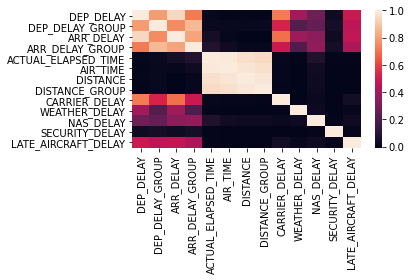

In [735]:
fig = sb.heatmap(matrix).get_figure()
fig.tight_layout()
fig.savefig('correlationHeatmap.png')

# Graphs

In [759]:
def hist_plot(col):
    fig = sb.histplot(df[col]).set_title('Distribution of ' + str(col))
    mpl.pyplot.xlabel(str(col))
    fig = fig.get_figure()
    fig.savefig(str(col) + '.png')

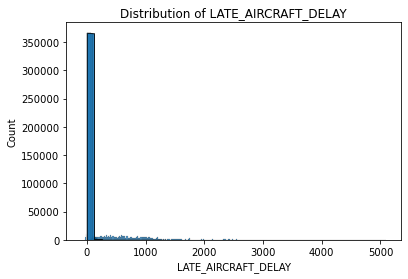

In [760]:
hist_plot('DEP_DELAY')
hist_plot('ARR_DELAY')
hist_plot('ACTUAL_ELAPSED_TIME')
hist_plot('AIR_TIME')
hist_plot('DISTANCE')
hist_plot('CARRIER_DELAY')
hist_plot('WEATHER_DELAY')
hist_plot('NAS_DELAY')
hist_plot('SECURITY_DELAY')
hist_plot('LATE_AIRCRAFT_DELAY')

In [767]:
def scatter(col1,col2):
    mpl.pyplot.figure()
    fig = sb.scatterplot(data=df,x=col1,y=col2).set_title('Comparison of '+str(col1)+' and '+str(col2))
    mpl.pyplot.xlabel(col1)
    mpl.pyplot.ylabel(col2)
    fig = fig.get_figure()
    fig.savefig(str(col1) + '_comp_' + str(col2) + '.png')

<ipython-input-767-2c47729f6d21>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  mpl.pyplot.figure()


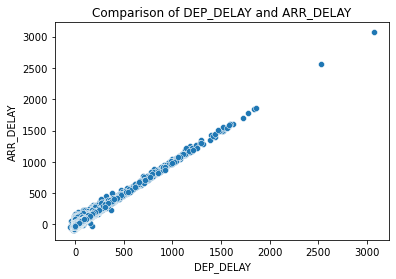

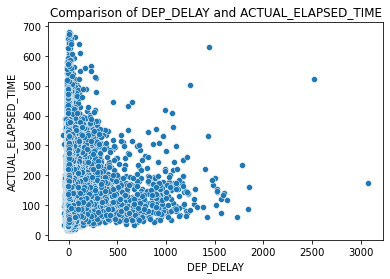

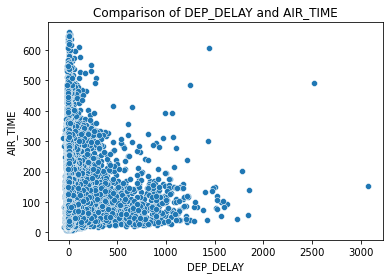

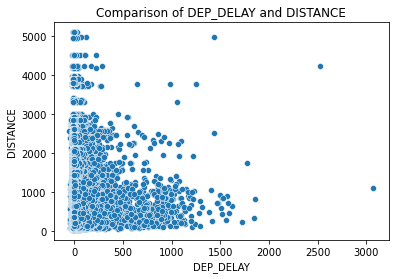

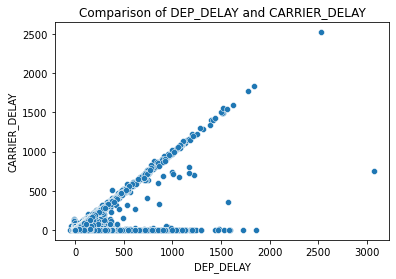

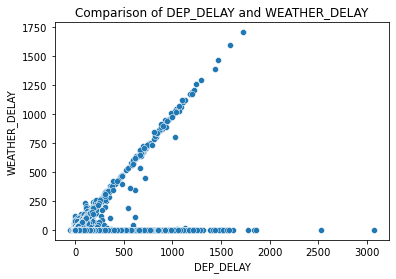

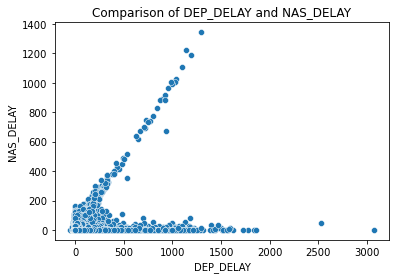

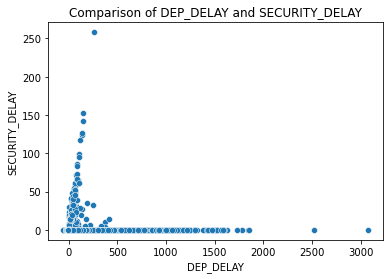

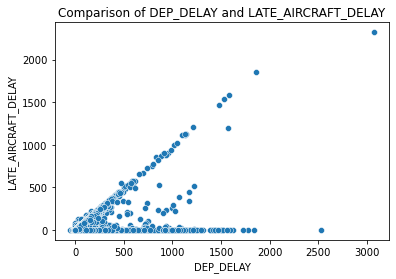

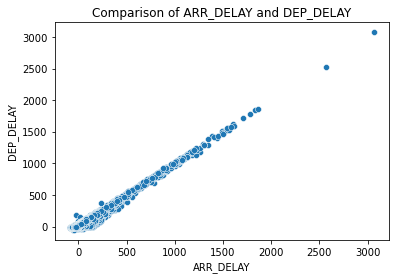

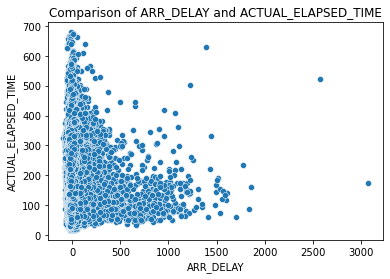

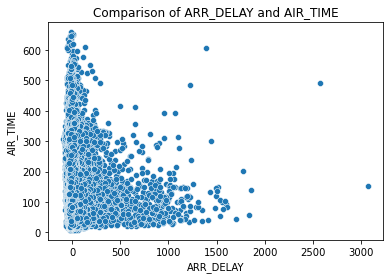

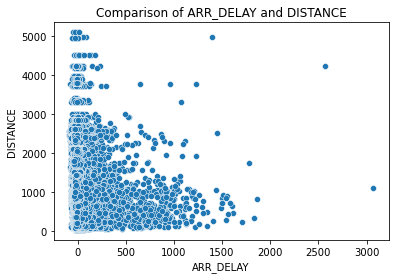

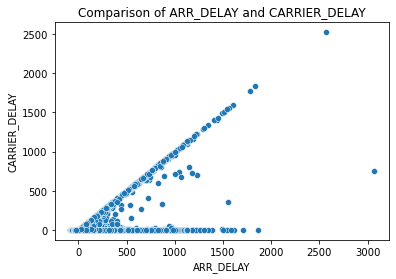

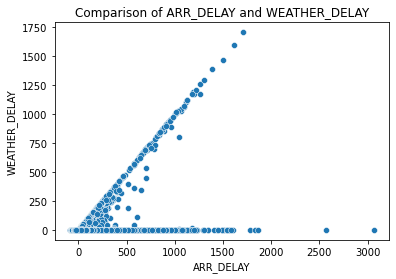

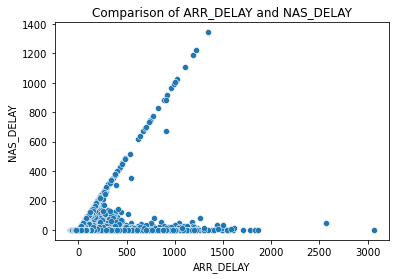

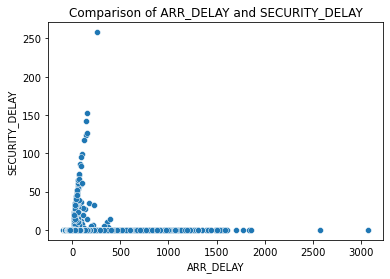

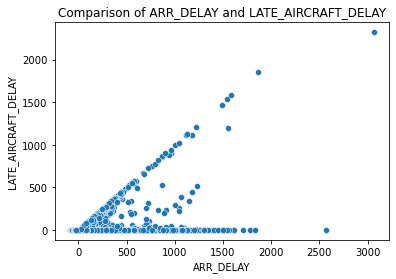

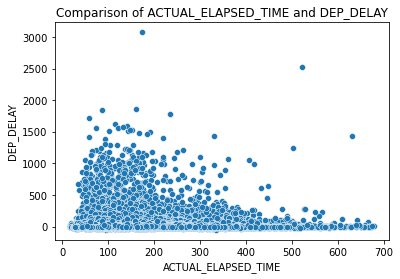

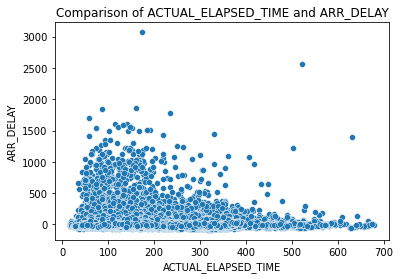

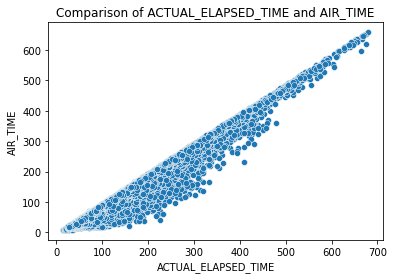

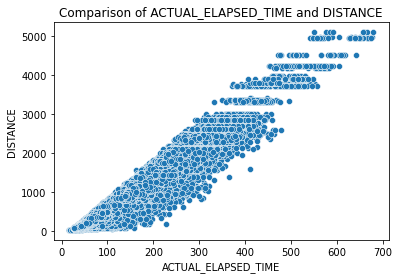

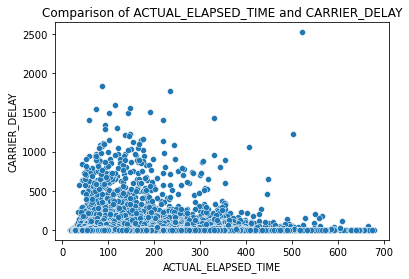

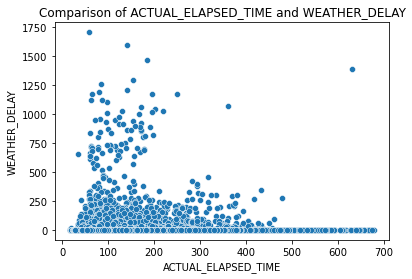

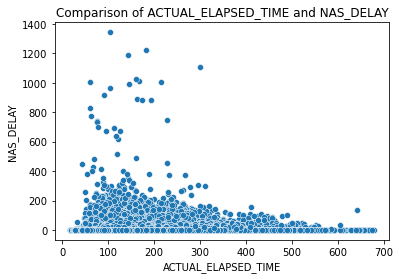

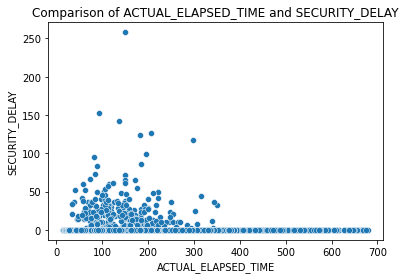

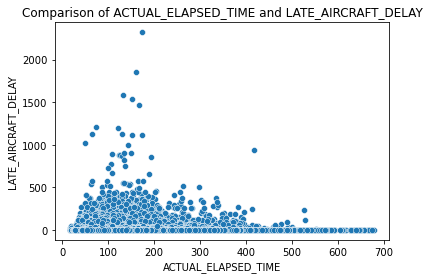

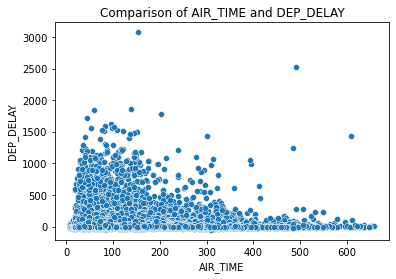

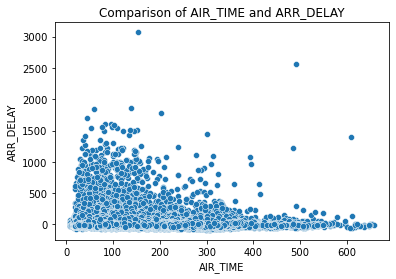

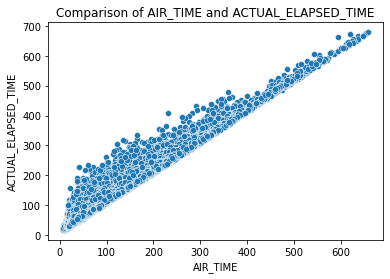

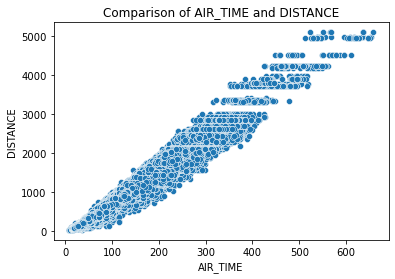

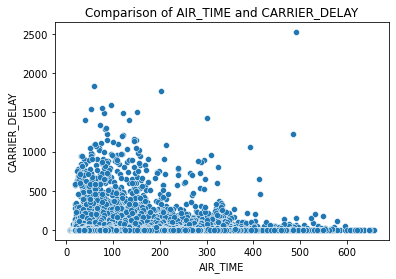

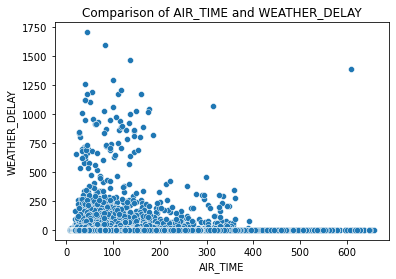

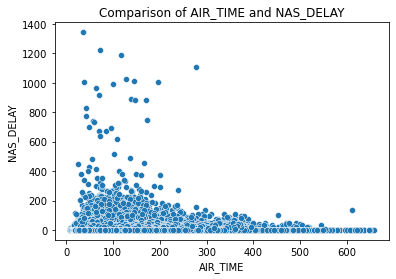

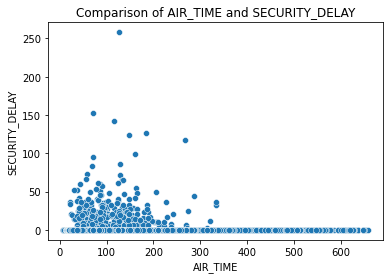

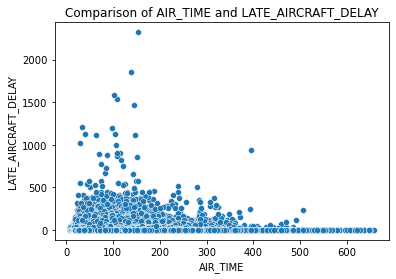

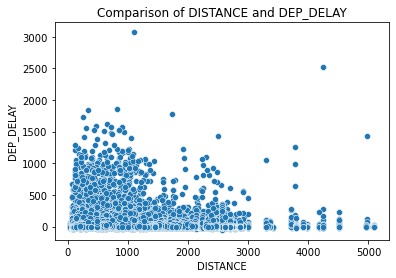

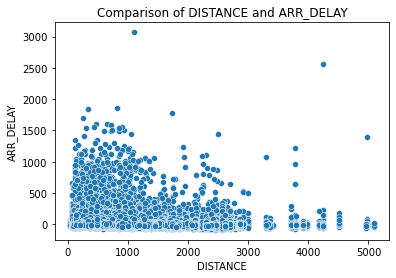

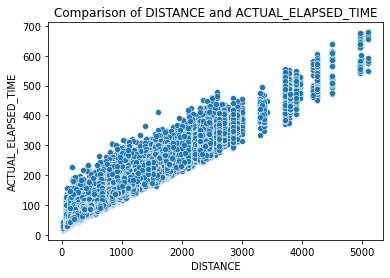

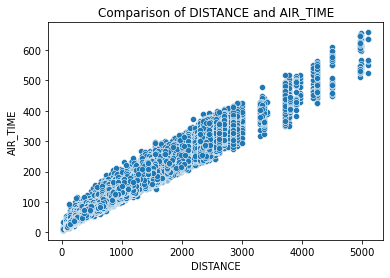

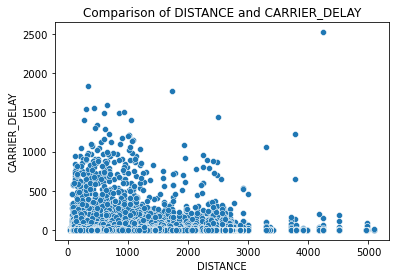

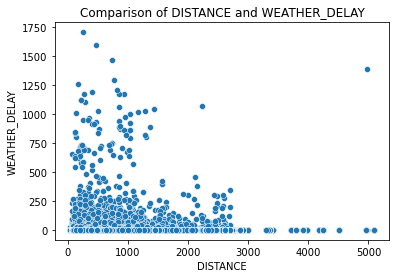

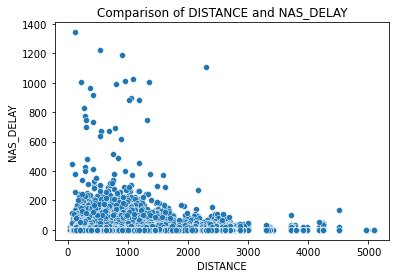

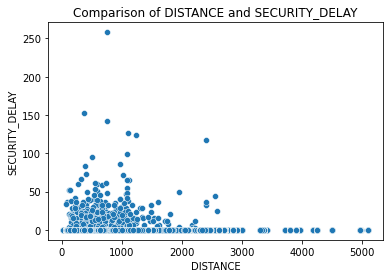

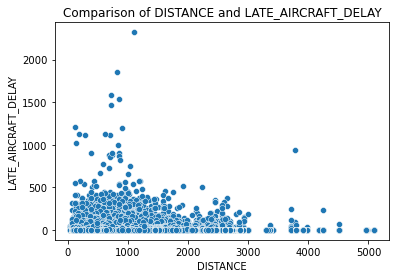

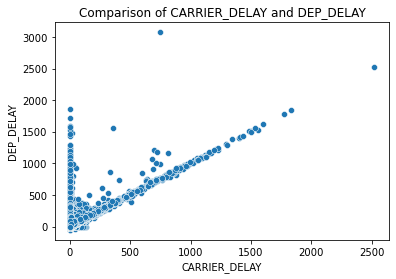

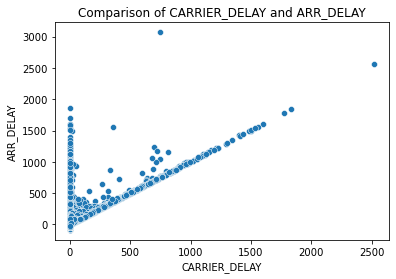

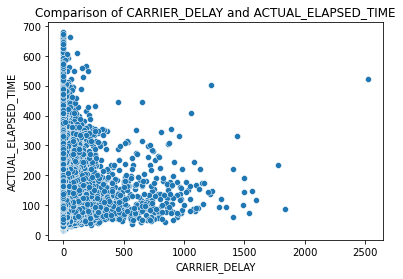

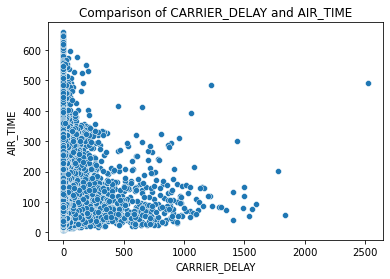

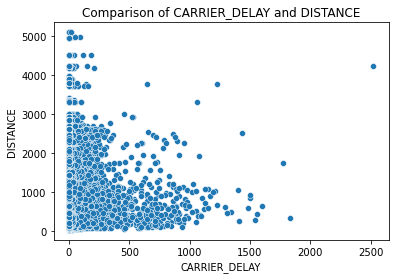

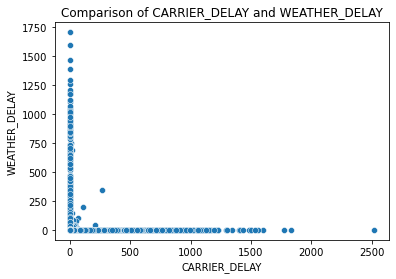

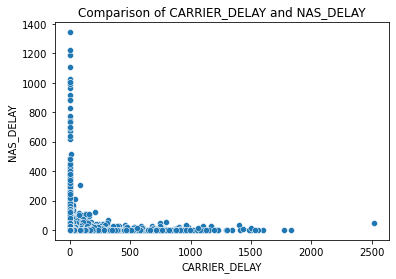

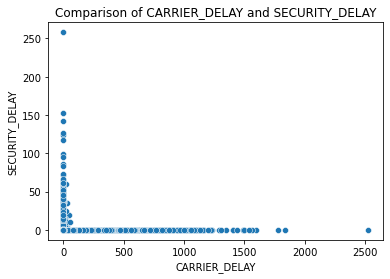

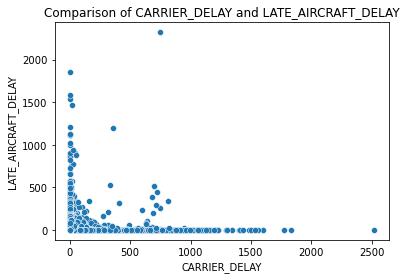

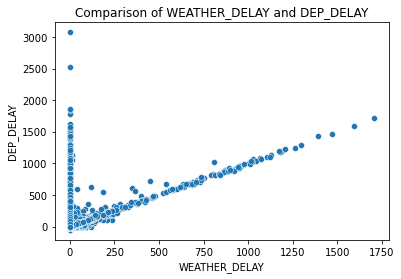

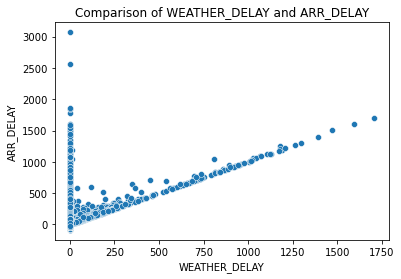

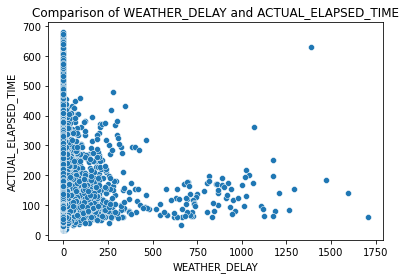

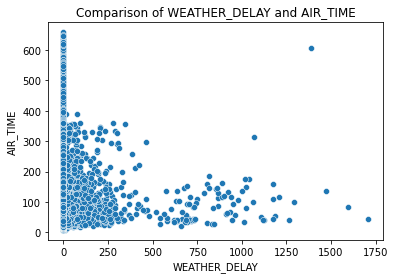

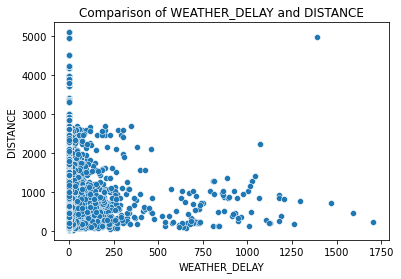

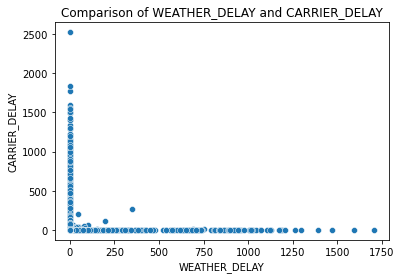

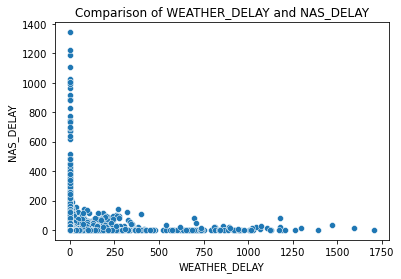

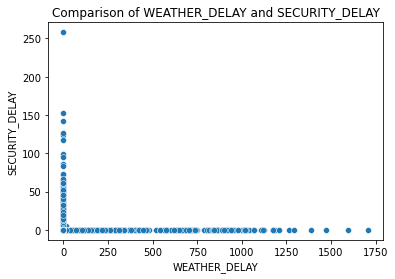

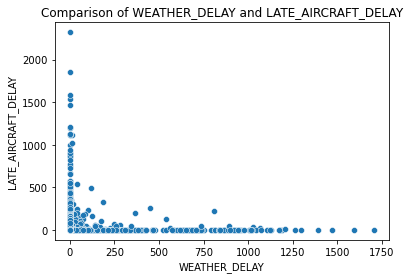

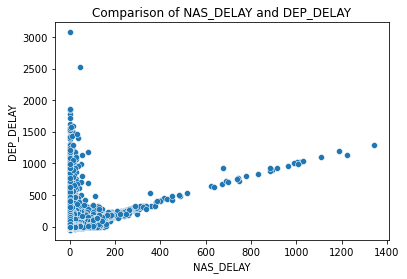

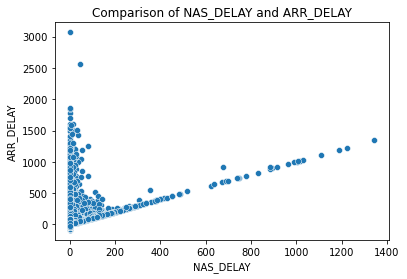

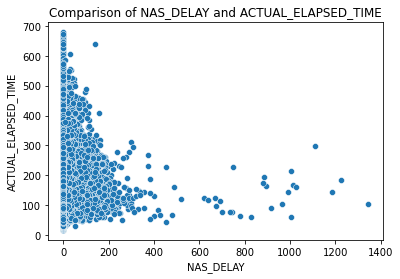

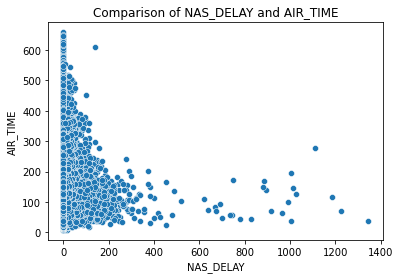

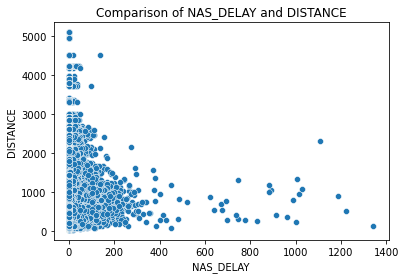

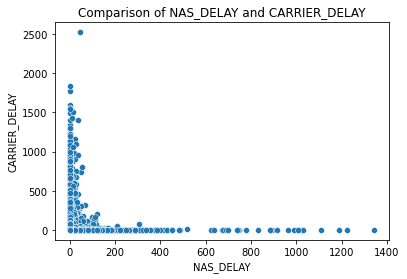

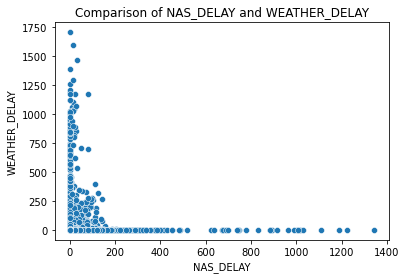

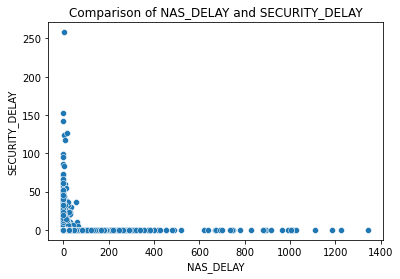

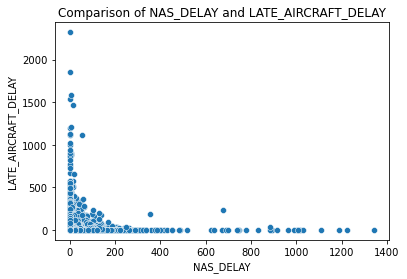

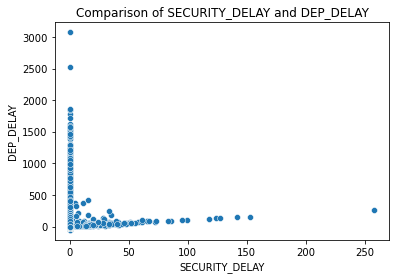

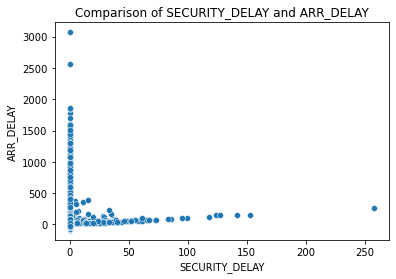

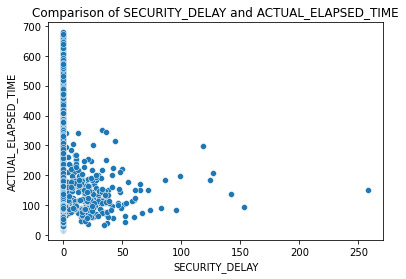

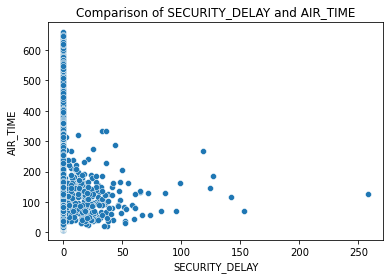

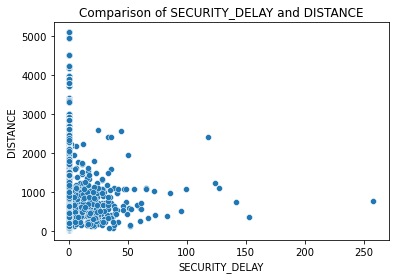

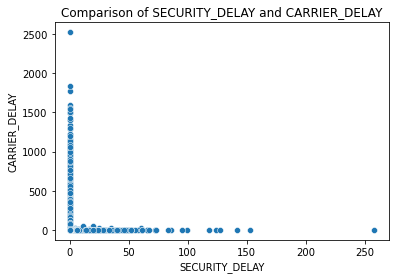

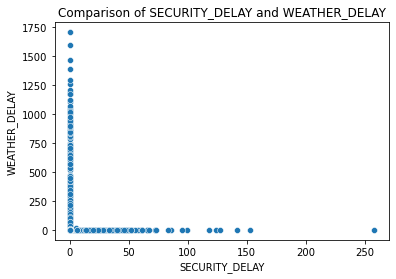

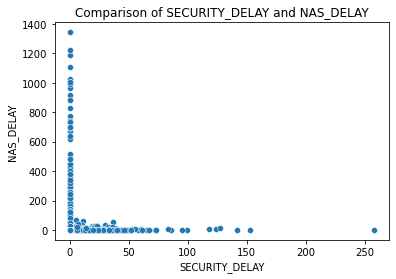

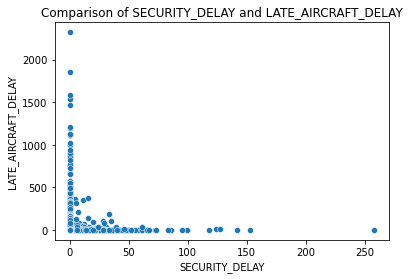

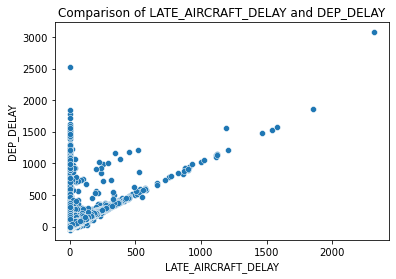

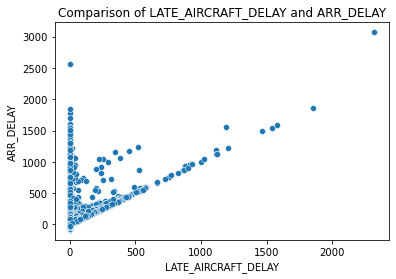

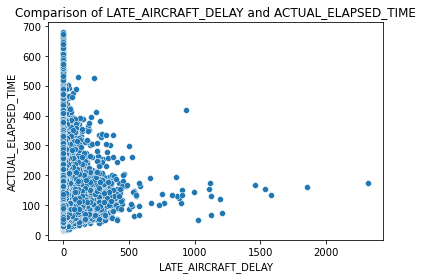

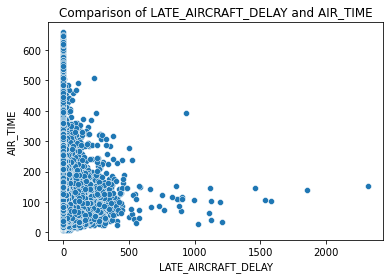

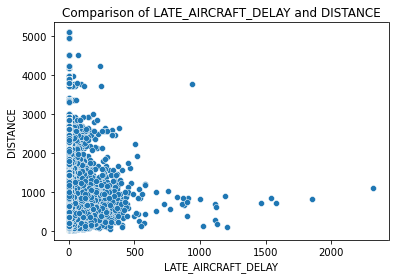

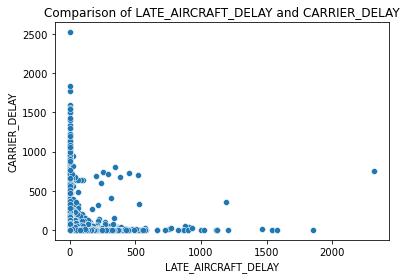

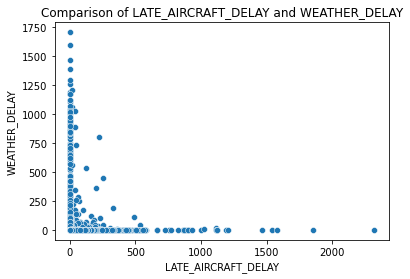

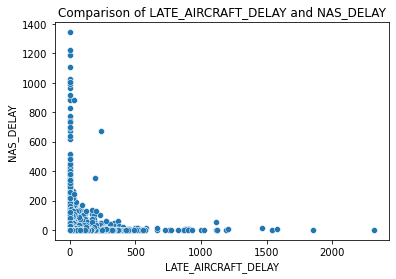

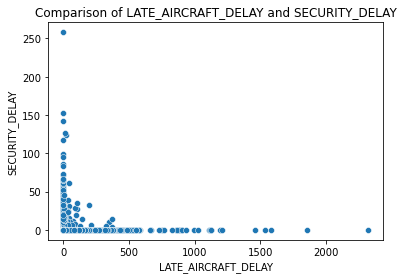

In [768]:
colList = ['DEP_DELAY','ARR_DELAY','ACTUAL_ELAPSED_TIME','AIR_TIME','DISTANCE','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']
for i in colList:
    for j in colList:
        if i==j:
            x=1
        else:
            scatter(i,j)

In [ ]:
def bar_plot(col):
    fig = sb.barplot(df[col]).set_title('')